<a href="https://colab.research.google.com/github/rrizwan98/SSUET-chatbot/blob/main/yaseen_Chatbot1.2%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow import keras

import re
from nltk.corpus import stopwords
import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [6]:
url='/content/drive/MyDrive/chatbot data.csv'
data = pd.read_csv(url, header='infer')
df

,Unnamed: 0,Question,Answer
0,0,Hi,Hello!
1,1,How are you,Good to see you again!
2,2,Is anyone there?,"Hi there, how can I help?"
3,3,Hello,Assalam-o-alaikum
4,4,Good day,I am SSSUET AI chat Solve the student qurees
...,...,...,...
233,233,canteens location?,SSuet canteen timing open at 9 am to 5 pm. ca...
234,234,ssuet canteen timing,SSuet canteen timing open at 9 am to 5 pm. ca...
235,235,Library timing,library timing of SSUET open 9 am 5 pm Monday-...
236,236,what are your hours to open the library,library timing of SSUET open 9 am 5 pm Monday-...


In [7]:
Question_text = df['Question']
Answer_text = df['Answer']

In [9]:
print("Unique values before dropping duplicates")
print(df.Question.nunique())
print(df.Answer.nunique())

df.drop_duplicates(subset=['Question'],inplace=True)
df.drop_duplicates(subset=['Answer'],inplace=True)

print("\n\nUnique values before dropping duplicates")
print(df.Question.nunique())
print(df.Answer.nunique())

Unique values before dropping duplicates
238
228


Unique values before dropping duplicates
228
228


In [10]:
print("Checking NA values\n")
print(df.isnull().any(),'\n')
print(df.isnull().sum())

Checking NA values

Unnamed: 0    False
Question      False
Answer        False
dtype: bool 

Unnamed: 0    0
Question      0
Answer        0
dtype: int64


In [11]:
print("before preprocessing")
df.tail(6)

before preprocessing


,Unnamed: 0,Question,Answer
229,229,Software Project Management class room?,Software Project Management Course Code:SWE401
230,230,Software Project Management COURSE CODE,Software Project Management class room: CS-05
231,231,Software Project Management teacher room?,Software Project Management teacher room: __un...
232,232,ssuet Canteens?,Welcome to SSUET canteen!
233,233,canteens location?,SSuet canteen timing open at 9 am to 5 pm. ca...
235,235,Library timing,library timing of SSUET open 9 am 5 pm Monday-...


In [13]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
eng_stopwords = set(stopwords.words("english"))

#language => either 'english' or 'french'
def preprocess(sentence,language):
    sentence = sentence.lower()
    if language == "english":
        sentence = ' '.join([contractions[word] if word in contractions else word for word in sentence.split()])
#         sentence = ' '.join([word for word in sentence.split() if word not in eng_stopwords])
    sentence = re.sub(r"[.'!#$%&\'()*+,-./:;<=>?@[\\]^ `{|}~]"," ",sentence)
    sentence = ' '.join([word for word in sentence.split()])
    
    return sentence

In [15]:
df.english = df.Question.apply(lambda x:preprocess(x,'english'))
df.french = df.Answer.apply(lambda x:preprocess(x,'french'))

print(df.shape,'\n')
df.info()

(228, 3) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 235
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  228 non-null    int64 
 1   Question    228 non-null    object
 2   Answer      228 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [16]:
print("after preprocessing")
df.tail(6)

after preprocessing


,Unnamed: 0,Question,Answer
229,229,Software Project Management class room?,Software Project Management Course Code:SWE401
230,230,Software Project Management COURSE CODE,Software Project Management class room: CS-05
231,231,Software Project Management teacher room?,Software Project Management teacher room: __un...
232,232,ssuet Canteens?,Welcome to SSUET canteen!
233,233,canteens location?,SSuet canteen timing open at 9 am to 5 pm. ca...
235,235,Library timing,library timing of SSUET open 9 am 5 pm Monday-...


In [23]:
import numpy as np
df["Question_input"] = df.french.apply(lambda x:'sostoken ' + x)
df["Answer_label"] = df.french.apply(lambda x:x + ' eostoken')

encoder_input = np.array(df.Question)
decoder_input = np.array(df.Question_input)
decoder_label = np.array(df.Answer_label)


indices = np.arange(228)
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_label = decoder_label[indices]

df.tail()

,Unnamed: 0,Question,Answer,Question_input,Answer_label
230,230,Software Project Management COURSE CODE,Software Project Management class room: CS-05,sostoken software project management class roo...,software project management class room: cs-05 ...
231,231,Software Project Management teacher room?,Software Project Management teacher room: __un...,sostoken software project management teacher r...,software project management teacher room: __un...
232,232,ssuet Canteens?,Welcome to SSUET canteen!,sostoken welcome to ssuet canteen!,welcome to ssuet canteen! eostoken
233,233,canteens location?,SSuet canteen timing open at 9 am to 5 pm. ca...,sostoken ssuet canteen timing open at 9 am to ...,ssuet canteen timing open at 9 am to 5 pm. can...
235,235,Library timing,library timing of SSUET open 9 am 5 pm Monday-...,sostoken library timing of ssuet open 9 am 5 p...,library timing of ssuet open 9 am 5 pm monday-...


In [27]:
total = df.shape[0]
test_size = 0.2

train_encoder_input = encoder_input[:-int(total*test_size)]
train_decoder_input = decoder_input[:-int(total*test_size)]
train_decoder_label = decoder_label[:-int(total*test_size)]

test_encoder_input = encoder_input[-int(total*test_size):]
test_decoder_input = decoder_input[-int(total*test_size):]
test_decoder_label = decoder_label[-int(total*test_size):]

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

train dataset shape
(183,)
(183,)
(183,)


test dataset shape
(45,)
(45,)
(45,)


In [28]:
eng_tok = Tokenizer()
eng_tok.fit_on_texts(train_encoder_input)
print(f"Number of unique words used in english sentences >> {len(eng_tok.index_word)}")

fr_tok = Tokenizer()
fr_tok.fit_on_texts(train_decoder_input)
fr_tok.fit_on_texts(train_decoder_label)
print(f"Number of unique words used in french sentences >> {len(fr_tok.index_word)}")

Number of unique words used in english sentences >> 112
Number of unique words used in french sentences >> 277


In [29]:
total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in eng_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"english","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")

========================= english =========================
22 of 112 words are used less than 3times,
which is only 20.0% of total words used
But they occupy 3.0% of total frequency 


In [30]:
total_counts = 0
rare_counts = 0
total_freq = 0
rare_freq = 0

least_occurence = 3
for k,v in fr_tok.word_counts.items():
    total_counts +=1
    total_freq += v
    if v < least_occurence:
        rare_counts+=1
        rare_freq += v

print("="*25,"french","="*25)
print(f"{rare_counts} of {total_counts} words are used less than {least_occurence}times,")
print(f"which is only {np.round(rare_counts/total_counts*100)}% of total words used")
print(f"But they occupy {np.round(rare_freq/total_freq*100)}% of total frequency ")

========================= french =========================
140 of 277 words are used less than 3times,
which is only 51.0% of total words used
But they occupy 10.0% of total frequency 


In [31]:
eng_word_size = 6000
eng_vocab_size = eng_word_size+1
fr_word_size = 12000
fr_vocab_size = fr_word_size+1

eng_tok = Tokenizer(num_words=eng_word_size)
eng_tok.fit_on_texts(train_encoder_input)

train_encoder_input = eng_tok.texts_to_sequences(train_encoder_input)
test_encoder_input = eng_tok.texts_to_sequences(test_encoder_input)

fr_tok = Tokenizer(num_words=fr_word_size)
fr_tok.fit_on_texts(train_decoder_input)
fr_tok.fit_on_texts(train_decoder_label)

train_decoder_input = fr_tok.texts_to_sequences(train_decoder_input)
train_decoder_label = fr_tok.texts_to_sequences(train_decoder_label)

test_decoder_input = fr_tok.texts_to_sequences(test_decoder_input)
test_decoder_label = fr_tok.texts_to_sequences(test_decoder_label)


Question.
mean >>  4.879781420765028
Answer.
mean >>  7.508196721311475


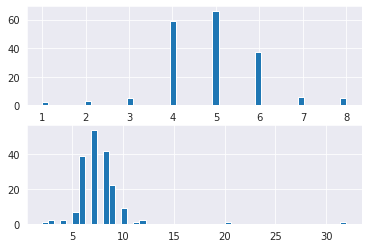

In [33]:
print("Question.")
eng_lens = [len(seq) for seq in train_encoder_input]
print("mean >> ",np.mean(eng_lens))
plt.subplot(2,1,1)
plt.hist(eng_lens,bins=50)


print("Answer.")
fr_lens = [len(seq) for seq in train_decoder_input]
print("mean >> ",np.mean(fr_lens))
plt.subplot(2,1,2)
plt.hist(fr_lens,bins=50)
plt.show()

In [34]:
eng_sequence_size = 10
fr_sequence_size = 20

train_encoder_input = pad_sequences(train_encoder_input,padding='post',truncating='post',maxlen=eng_sequence_size)
test_encoder_input = pad_sequences(test_encoder_input,padding='post',truncating='post',maxlen=eng_sequence_size)

train_decoder_input = pad_sequences(train_decoder_input,padding='post',truncating='post',maxlen=fr_sequence_size)
train_decoder_label = pad_sequences(train_decoder_label,padding='post',truncating='post',maxlen=fr_sequence_size)

test_decoder_input = pad_sequences(test_decoder_input,padding='post',truncating='post',maxlen=fr_sequence_size)
test_decoder_label = pad_sequences(test_decoder_label,padding='post',truncating='post',maxlen=fr_sequence_size)

print("train dataset shape")
print(train_encoder_input.shape)
print(train_decoder_input.shape)
print(train_decoder_label.shape)

print("\n\ntest dataset shape")
print(test_encoder_input.shape)
print(test_decoder_input.shape)
print(test_decoder_label.shape)

train dataset shape
(183, 10)
(183, 20)
(183, 20)


test dataset shape
(45, 10)
(45, 20)
(45, 20)


In [36]:
from keras.layers import Input,Embedding,LSTM,Dense,Concatenate,Attention
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras import backend as K

#hyperparameters
embedding_size = 256
hidden_size = 256

# trainer model (generator model will use the same encoder tho)
encoder_input = Input(shape=[eng_sequence_size])
encoder_embedding = Embedding(eng_vocab_size,embedding_size,mask_zero=True)
encoder_embedded = encoder_embedding(encoder_input)

encoder_lstm1 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output1,encoder_h1,encoder_c1 = encoder_lstm1(encoder_embedded)

encoder_lstm2 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output2,encoder_h2,encoder_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output3,encoder_h3,encoder_c3 = encoder_lstm3(encoder_output1)

decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(fr_vocab_size,embedding_size,mask_zero=True)
decoder_embedded = decoder_embedding(decoder_input)

decoder_lstm = LSTM(hidden_size,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
decoder_output,_,_ = decoder_lstm(decoder_embedded,initial_state=[encoder_h3,encoder_c3])

attn_layer = Attention()
attn_context = attn_layer([decoder_output,encoder_output3])

decoder_output = Concatenate(axis=-1)([decoder_output,attn_context])
tanh_dense= Dense(hidden_size*2,activation=K.tanh)
decoder_output = tanh_dense(decoder_output)

softmax_dense = Dense(fr_vocab_size,activation='softmax')
decoder_output = softmax_dense(decoder_output)

trainer_model = Model([encoder_input,decoder_input],decoder_output)
trainer_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


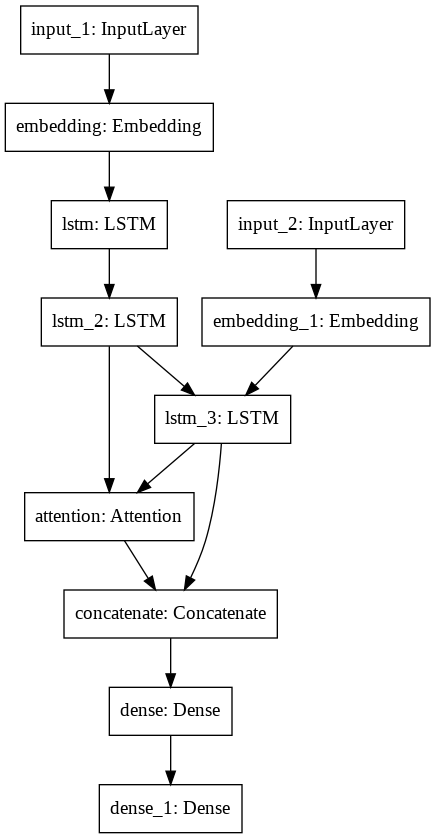

In [37]:
plot_model(trainer_model)

In [39]:
trainer_hist =trainer_model.fit([train_encoder_input,train_decoder_input],train_decoder_label,epochs=100,batch_size=128,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 401ms/step - loss: 1.5797 - accuracy: 0.1413 - val_loss: 2.1367 - val_accuracy: 0.1364
Epoch 2/100
2/2 [==============================] - 1s 361ms/step - loss: 1.5750 - accuracy: 0.1413 - val_loss: 2.1275 - val_accuracy: 0.1399
Epoch 3/100
2/2 [==============================] - 1s 369ms/step - loss: 1.5660 - accuracy: 0.1506 - val_loss: 2.1181 - val_accuracy: 0.1434
Epoch 4/100
2/2 [==============================] - 1s 380ms/step - loss: 1.5555 - accuracy: 0.1543 - val_loss: 2.1140 - val_accuracy: 0.1434
Epoch 5/100
2/2 [==============================] - 1s 350ms/step - loss: 1.5454 - accuracy: 0.1561 - val_loss: 2.1111 - val_accuracy: 0.1434
Epoch 6/100
2/2 [==============================] - 1s 365ms/step - loss: 1.5354 - accuracy: 0.1506 - val_loss: 2.1066 - val_accuracy: 0.1469
Epoch 7/100
2/2 [==============================] - 1s 342ms/step - loss: 1.5271 - accuracy: 0.1496 - val_loss: 2.1031 - val_accuracy: 0.1713
Epoch 8/100
2

In [40]:
#generator model
gen_encoder = Model([encoder_input],[encoder_output3,encoder_h3,encoder_c3])

gen_decoder_values_input = Input(shape=(eng_sequence_size,hidden_size))
gen_decoder_h_input = Input(shape=[hidden_size])
gen_decoder_c_input = Input(shape=[hidden_size])

gen_decoder_embedded = decoder_embedding(decoder_input)
gen_decoder_output,gen_decoder_h,gen_decoder_c = decoder_lstm(gen_decoder_embedded,initial_state=[gen_decoder_h_input,gen_decoder_c_input])

attn_context = attn_layer([gen_decoder_output,gen_decoder_values_input])
gen_decoder_output = Concatenate(axis=-1)([gen_decoder_output,attn_context])

gen_decoder_output = tanh_dense(gen_decoder_output)
gen_decoder_output = softmax_dense(gen_decoder_output)

gen_decoder = Model([decoder_input]+[gen_decoder_values_input,gen_decoder_h_input,gen_decoder_c_input],[gen_decoder_output,gen_decoder_h,gen_decoder_c])

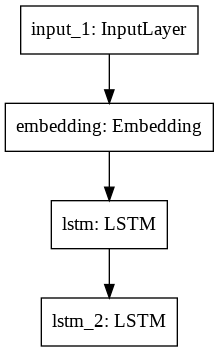

In [41]:
plot_model(gen_encoder)

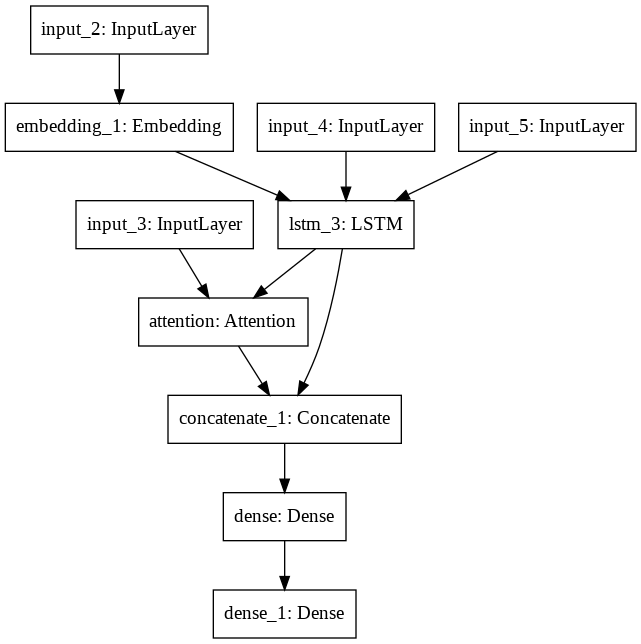

In [42]:
plot_model(gen_decoder)

In [43]:
def seq2eng(seq):
    ret =[]
    for n in seq:
        if n != 0:
            ret.append(eng_tok.index_word[n])
    ret = ' '.join(ret)
    return ret

def seq2fr(seq):
    ret =[]
    for n in seq:
        if n != 0 and fr_tok.index_word[n] != 'eostoken':
            ret.append(fr_tok.index_word[n])
    ret = ' '.join(ret)
    return ret

In [44]:
def generate_from_encoder_input(encoder_input):
    encoder_input = encoder_input.reshape(1,-1)
    values,h,c = gen_encoder.predict(encoder_input)
    
    single_tok = np.zeros((1,1))
    single_tok[0,0] = fr_tok.word_index['sostoken']
    decoder_input = single_tok
    
    generated = []
    count = 0
    while(True):
        decoder_output,new_h,new_c = gen_decoder.predict([decoder_input]+[values,h,c])
        count +=1
        
        sampled_index = np.argmax(decoder_output[0,-1,:])
        sampled_word = fr_tok.index_word[sampled_index]
        
        if sampled_word != 'eostoken' and sampled_index != 0:
            generated.append(sampled_word)
        if count >= fr_sequence_size or sampled_word == 'eostoken':
            break
        
        h,c = new_h,new_c
        decoder_input[0,0] = sampled_index
    
    generated = ' '.join(generated)
    return generated

In [46]:
for i in range(128,168):
    print("\n<<sample encoder input english sentence>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("<<sample generated french sentence>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("<<answer french sentence>>")
    print(seq2fr(train_decoder_label[i]))
    print("========================================\n")


<<sample encoder input english sentence>>
organizational behaviour class room


<<sample generated french sentence>>
itc credit hours 3


<<answer french sentence>>
organizational behaviour course code hs212


<<sample encoder input english sentence>>
compiler construction credit hours


<<sample generated french sentence>>
itc credit hours 3


<<answer french sentence>>
compiler construction credit hours 3


<<sample encoder input english sentence>>
linear algebra differential equations credit hours


<<sample generated french sentence>>
software to to lab teacher room cf


<<answer french sentence>>
linear algebra differential equations credit hours 3


<<sample encoder input english sentence>>
programing fundamentals course code


<<sample generated french sentence>>
itc credit hours


<<answer french sentence>>
programing fundamentals class room cf 4a


<<sample encoder input english sentence>>
is anyone there


<<sample generated french sentence>>
good good credit


<<answer fren

In [50]:
idx = [1,100,111,180,10]

print("Results on Train Dataset")
for i in idx:
    print("\nINPUT ENG>>")
    print(seq2eng(train_encoder_input[i]))
    print("\n")
    print("GENERATED FR>>")
    print(generate_from_encoder_input(train_encoder_input[i]))
    print("\n")
    print("ANSWER FR>>")
    print(seq2fr(train_decoder_label[i]))
    print("=====================================================================\n")

Results on Train Dataset

INPUT ENG>>
introduction to database system course code


GENERATED FR>>
software to lab teacher room cf


ANSWER FR>>
introduction to database system class room cs 02


INPUT ENG>>
artificial intelliigence class room


GENERATED FR>>
computer intelliigence credit hours 3


ANSWER FR>>
artificial intelliigence course code swe407


INPUT ENG>>
software design archietecture lab teacher no


GENERATED FR>>
software to to lab teacher room cf


ANSWER FR>>
software design archietecture lab teacher no undefine


INPUT ENG>>
computer organization architecture lab teacher no


GENERATED FR>>
software to lab teacher room cf


ANSWER FR>>
computer organization architecture lab teacher no undefine


INPUT ENG>>
automata theory formal languages credit hours


GENERATED FR>>
software to to lab teacher room cf


ANSWER FR>>
automata theory formal languages credit hours 2

